#Colab 搭配 OpenVINO Pretrained Model 人臉偵測範例

歐尼克斯實境互動工作室 OmniXRI Jack, 2021.6.4

# 1. 安裝Intel OpenVINO工具包
以apt方式安裝OpenVINO，安裝版本為 2021.3.394  
預設安裝路徑為/opt/intel/OpenVINO_2021.3.394，系統會自建出/opt/intel/OpenVINO_2021捷徑名稱，後續可使用這個較短捷徑名稱。

In [1]:
# 顯示目前工作目錄
!pwd
# 取得OpenVINO 2021公開金錀
!wget https://apt.repos.intel.com/openvino/2021/GPG-PUB-KEY-INTEL-OPENVINO-2021 
# 加入OpenVINO公開金錀到系統金錀群中
!apt-key add GPG-PUB-KEY-INTEL-OPENVINO-2021 
# 建立更新安裝清單檔案
!touch /etc/apt/sources.list.d/intel-openvino-2021.list
# 將下載指令加入安裝清單中
!echo "deb https://apt.repos.intel.com/openvino/2021 all main" >> /etc/apt/sources.list.d/intel-openvino-2021.list
# 更新系統
!apt update
# 安裝OpenVINO到虛擬機系統中
!apt install intel-openvino-dev-ubuntu18-2021.3.394
# 列出安裝路徑下內容進行確認
!ls /opt/intel

--2021-06-04 06:56:58--  https://apt.repos.intel.com/openvino/2021/GPG-PUB-KEY-INTEL-OPENVINO-2021
Resolving apt.repos.intel.com (apt.repos.intel.com)... 95.101.204.15, 2a02:26f0:b200:38e::4b23, 2a02:26f0:b200:38d::4b23
Connecting to apt.repos.intel.com (apt.repos.intel.com)|95.101.204.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 939 [binary/octet-stream]
Saving to: ‘GPG-PUB-KEY-INTEL-OPENVINO-2021’

GPG-PUB-KEY-INTEL-O 100%[===================>]     939  --.-KB/s    in 0s      

2021-06-04 06:56:58 (68.1 MB/s) - ‘GPG-PUB-KEY-INTEL-OPENVINO-2021’ saved [939/939]

OK
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://ppa.launchpad.net/dead

# 2. 下載人臉偵測模型
可選用下列物件（人臉）偵測模型，更多可選用模型可參考
https://docs.openvinotoolkit.org/latest/object_detection_models_intel.html 

*   face-detection-adas-xxxx 
*   face-detection-retail-xxxx
*   face-detection-xxxx  

這裡選用 **--name face-detection-retail-0005**  （可自行變更所需模型名稱）  
注意！執行OpenVINO功能前記得設定環境變數（setupvars.sh），否則會得到錯誤訊息。  


In [3]:
# 執行環境設定批次檔並以模型下載器取得模型
!source /opt/intel/openvino_2021/bin/setupvars.sh && \
python /opt/intel/openvino_2021/deployment_tools/tools/model_downloader/downloader.py \
--name face-detection-retail-0005

[setupvars.sh] OpenVINO environment initialized
################|| Downloading face-detection-retail-0005 ||################

========== Downloading /content/intel/face-detection-retail-0005/FP32/face-detection-retail-0005.xml
... 100%, 162 KB, 2906 KB/s, 0 seconds passed

========== Downloading /content/intel/face-detection-retail-0005/FP32/face-detection-retail-0005.bin
... 100%, 3987 KB, 27453 KB/s, 0 seconds passed

========== Downloading /content/intel/face-detection-retail-0005/FP16/face-detection-retail-0005.xml
... 100%, 161 KB, 3035 KB/s, 0 seconds passed

========== Downloading /content/intel/face-detection-retail-0005/FP16/face-detection-retail-0005.bin
... 100%, 1993 KB, 94320 KB/s, 0 seconds passed

========== Downloading /content/intel/face-detection-retail-0005/FP16-INT8/face-detection-retail-0005.xml
... 100%, 431 KB, 5075 KB/s, 0 seconds passed

========== Downloading /content/intel/face-detection-retail-0005/FP16-INT8/face-detection-retail-0005.bin
... 100%, 1073 KB, 

# 3. 模型優化
如果下載的是Intel's Pretrained Model則不需轉換就自帶IR檔(xml,bin)  
若是Public Pretrained Model則須進行轉換成IR檔，系統會自動判別。  
--name 參數為待轉換模型名稱  

In [4]:
# 下載及安裝test-generator 方便檢查程式運行錯誤
!pip install test-generator==0.1.1

# 執行環境設定批次檔並將下載到的模型檔進行優化轉換產生IR(xml & bin)檔
!source /opt/intel/openvino_2021/bin/setupvars.sh && \
python /opt/intel/openvino_2021/deployment_tools/tools/model_downloader/converter.py \
--name face-detection-retail-0005

[setupvars.sh] OpenVINO environment initialized
========== Skipping face-detection-retail-0005 (no conversions defined)



檢查模型轉檔後會產生/FP16, FP16-INT8, FP32不同精度的IR檔(xml, bin)

In [5]:
!ls /content/intel/face-detection-retail-0005
!ls /content/intel/face-detection-retail-0005/FP32

FP16  FP16-INT8  FP32
face-detection-retail-0005.bin	face-detection-retail-0005.xml


# 4. 準備測試影像
從網路獲取任意一張測試影像並顯示


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  # Remove the CWD from sys.path while we load stuff.


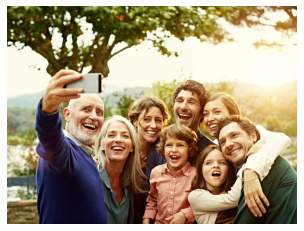

In [39]:
# 以OpenCV檢視輸入影像
import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests

# 從網路獲取一張影像
file = requests.get("http://zahal-levy.com/wp-content/uploads/family-parents-grandparents-Morsa-Images-Taxi-56a906ad3df78cf772a2ef29.jpg")
# 將影像轉成OpenCV格式
img = cv2.imdecode(np.fromstring(file.content, np.uint8), 1)
cv2.imwrite('face.jpg',img)

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 將影像從BGR格式轉到RGB格式，才能讓plt.imshow()正確顯示
plt.figure() # 準備一顯示影像空間
plt.axis("off") # 設定關閉XY軸刻尺
plt.imshow(rgb) # 顯示影像

為更清楚了解物件偵測範例程式可支援的模型，可將models.lst及使用方式列出來確認。（此步驟可忽略）

In [37]:
!ls /opt/intel/openvino_2021/deployment_tools/inference_engine/demos/object_detection_demo/python/
# 列出可支援的模型名稱及對應的結構類型(architecture_type)
!cat /opt/intel/openvino_2021/deployment_tools/inference_engine/demos/object_detection_demo/python/models.lst

models.lst  object_detection_demo.py  README.md
# This file can be used with the --list option of the model downloader.
# For --architecture_type=centernet
ctdet_coco_dlav0_384
ctdet_coco_dlav0_512
# For --architecture_type=ctpn
ctpn
# For --architecture_type=faceboxes
faceboxes-pytorch
# For --architecture_type=ssd
efficientdet-d0-tf
efficientdet-d1-tf
face-detection-????
face-detection-adas-????
face-detection-retail-????
faster-rcnn-resnet101-coco-sparse-60-0001
pedestrian-and-vehicle-detector-adas-????
pedestrian-detection-adas-????
pelee-coco
person-detection-????
person-detection-retail-0013
person-vehicle-bike-detection-????
product-detection-0001
retinanet-tf
rfcn-resnet101-coco-tf
ssd300
ssd512
ssd_mobilenet_v1_coco
ssd_mobilenet_v1_fpn_coco
ssd_mobilenet_v2_coco
ssd_resnet50_v1_fpn_coco
ssd-resnet34-1200-onnx
ssdlite_mobilenet_v2
vehicle-detection-????
vehicle-detection-adas-????
vehicle-license-plate-detection-barrier-????
# For --architecture_type=retinaface
retinaface-anti

In [19]:
# 列出物件偵測程式的參數說明文件
!cat /opt/intel/openvino_2021/deployment_tools/inference_engine/demos/object_detection_demo/python/README.md

models.lst  object_detection_demo.py  README.md
# This file can be used with the --list option of the model downloader.
# For --architecture_type=centernet
ctdet_coco_dlav0_384
ctdet_coco_dlav0_512
# For --architecture_type=ctpn
ctpn
# For --architecture_type=faceboxes
faceboxes-pytorch
# For --architecture_type=ssd
efficientdet-d0-tf
efficientdet-d1-tf
face-detection-????
face-detection-adas-????
face-detection-retail-????
faster-rcnn-resnet101-coco-sparse-60-0001
pedestrian-and-vehicle-detector-adas-????
pedestrian-detection-adas-????
pelee-coco
person-detection-????
person-detection-retail-0013
person-vehicle-bike-detection-????
product-detection-0001
retinanet-tf
rfcn-resnet101-coco-tf
ssd300
ssd512
ssd_mobilenet_v1_coco
ssd_mobilenet_v1_fpn_coco
ssd_mobilenet_v2_coco
ssd_resnet50_v1_fpn_coco
ssd-resnet34-1200-onnx
ssdlite_mobilenet_v2
vehicle-detection-????
vehicle-detection-adas-????
vehicle-license-plate-detection-barrier-????
# For --architecture_type=retinaface
retinaface-anti

#5. 進行推論
執行環境設定批次檔並執行推論  

輸入參數：  
-d 執行裝置，預設為CPU (Colab提供的Intel Xeon CPU),Colab不支援Intel的GPU,MYRIAD(VPU),FPGA   
-i 輸入影像名稱 (\*.png, \*.jpg ...)  
-m 模型名稱 (\*.xml)  
-o 輸出結果名稱 (\*.png, \*.jpg ...)  

最後顯示推論結果

[setupvars.sh] OpenVINO environment initialized
[ INFO ] Initializing Inference Engine...
[ INFO ] Loading network...
[ INFO ] Reading network from IR...
[ INFO ] Use SingleOutputParser
[ INFO ] Loading network to CPU plugin...
[ INFO ] Starting inference...
To close the application, press 'CTRL+C' here or switch to the output window and press ESC key
OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 8 and format 'image2 / image2 sequence'
Unable to init server: Could not connect: Connection refused
Traceback (most recent call last):
  File "/opt/intel/openvino_2021/deployment_tools/inference_engine/demos/object_detection_demo/python/object_detection_demo.py", line 340, in <module>
    sys.exit(main() or 0)
  File "/opt/intel/openvino_2021/deployment_tools/inference_engine/demos/object_detection_demo/python/object_detection_demo.py", line 270, in main
    cv2.imshow('Detection Results', frame)
cv2.error: OpenCV(4.5.2-openvino) ../opencv/modules/highgui/src/window_gtk

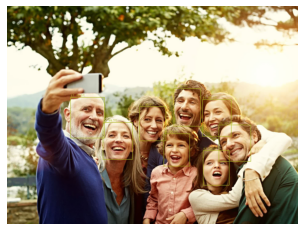

In [38]:

!source /opt/intel/openvino_2021/bin/setupvars.sh && \
python \
/opt/intel/openvino_2021/deployment_tools/inference_engine/demos/object_detection_demo/python/object_detection_demo.py -at ssd \
-i 'face.jpg' \
-m /content/intel/face-detection-retail-0005/FP32/face-detection-retail-0005.xml \
-o 'output.jpg'

!ls

out_img = cv2.imread('output.jpg') # 讀入欲顯示影像檔案
out_rgb = cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB) # 將影像從BGR格式轉到RGB格式，才能讓plt.imshow()正確顯示
plt.figure() # 準備一顯示影像空間
plt.axis("off") # 設定關閉XY軸刻尺
plt.imshow(out_rgb) # 顯示影像